# Tensorflow 
- Is similar to numpy but with GPU support 
- Supports Distributed Computing 
- Includes a kind of JIT (Just in Time) compiler that allows to optimize computation for speed and memory usage
- Works by extracting the computation graph from python function then optimizes it (by automatically running parallel process). these computation graphs can be exported to portable format, making tensorflow to train in one enviornment (say on Linux) and run on another (say on Java)
- Implements Autodiff and provides excellent optimizer such as RMS Prop and Nadam - so you can easily minimize all sort of loss functions
- Tensorflow API revolves around tensors which flows from one operations to another - hence tensorflow. 
- Tensorflow is usually multidimensional array (like numpy) but it can also hold scalar 


In [1]:
import tensorflow as tf
# using tf.constant
tf.constant([[1,2,3], [4,5,6]])

2025-07-04 18:24:02.238210: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-07-04 18:24:02.238263: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-07-04 18:24:02.238273: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
I0000 00:00:1751633642.238344 1644943 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1751633642.238425 1644943 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

In [2]:
# just like numpy ndarray we can perform various operations like shape and datatype 
t = tf.constant([[1.,2.,3.], [4.,5.,6.]])
t.shape

TensorShape([2, 3])

In [3]:
t.dtype

tf.float32

In [5]:
t

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [ ]:
# get all rows and 2nd column
t[:,1]

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 5.], dtype=float32)>

In [ ]:
# slice the data on new axis 
t[..., 1, tf.newaxis]

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [ ]:
# add scalar to the tensor; equivalent to tf.add(t, 10)
t+10 

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [10]:
tf.square(t)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [11]:
# Matrix multiplication 
t@tf.transpose(t)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

```
Numpy by default is bit64 and tensorflow is bit32. Also there is no implicit type conversion in tensorflow. If type mismatch happens tensorflow will return error

In [12]:
# below will give error adding float with integer
tf.constant(2.) + tf.constant(40)

InvalidArgumentError: cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2] name: 

### Variables 

In [18]:
v = tf.Variable([[1.,2.,3.], [4.,5.,6.]])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [19]:
# variable in tensorflow is same as tf.tensor -> Only difference is you can modify the values using assign statement 
v.assign(v*2)
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [ ]:
# update row0 col0 with 100.0 and row1 and col2 with 200.0 
v.scatter_nd_update(indices=[[0, 0], [1, 2]], updates=[100., 200.])
v

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[100.,   4.,   6.],
       [  8.,  10., 200.]], dtype=float32)>

```
From and To Numpy 

In [32]:
import numpy as np 

a = np.array([2., 4., 5.])
tf.constant(a)

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([2., 4., 5.])>

In [33]:
t.numpy()

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

In [34]:
# above is equivalent to 
np.array(t)

array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)

# Other Data Structure 
1. Sparse Tensor: Tensor containing mostly zeroes. tf.sparse package contains operations for sparse tensor 
2. Tensor Array: List of tensors, having fixed size by default. However, optionally can be made dynamic 
3. Ragged Tensor: List of list of tensor where every tensor has the same shape and dtype. tf.ragged package contains operations for ragged tensor 
4. String Tensor: Regular tensor of type tf.String. Represents byte string instead of unicode 

### Strings 

In [35]:
tf.constant(b"hello world")

<tf.Tensor: shape=(), dtype=string, numpy=b'hello world'>

In [36]:
tf.constant("café")

<tf.Tensor: shape=(), dtype=string, numpy=b'caf\xc3\xa9'>

In [37]:
# convert the cafe to numeric representation 
u = tf.constant([ord(c) for c in "café"])
u

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233], dtype=int32)>

In [38]:
b = tf.strings.unicode_encode(u, "UTF-8")
tf.strings.length(b, unit="UTF8_CHAR")

<tf.Tensor: shape=(), dtype=int32, numpy=4>

In [39]:
tf.strings.unicode_decode(b, "UTF-8")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([ 99,  97, 102, 233], dtype=int32)>

### String arrays 

In [40]:
p = tf.constant(["Café", "Coffee", "caffè", "咖啡"])
tf.strings.length(p, unit="UTF8_CHAR")

<tf.Tensor: shape=(4,), dtype=int32, numpy=array([4, 6, 5, 2], dtype=int32)>

In [41]:
r = tf.strings.unicode_decode(p, "UTF8")
r

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101],
 [99, 97, 102, 102, 232], [21654, 21857]]>

In [42]:
print(r)

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101],
 [99, 97, 102, 102, 232], [21654, 21857]]>


### Ragged Tensor

In [43]:
print(r[1])

tf.Tensor([ 67 111 102 102 101 101], shape=(6,), dtype=int32)


In [44]:
print(r[1:3])

<tf.RaggedTensor [[67, 111, 102, 102, 101, 101], [99, 97, 102, 102, 232]]>


In [45]:
r2 = tf.ragged.constant([[65, 66], [], [67]])
print(tf.concat([r, r2], axis=0))

<tf.RaggedTensor [[67, 97, 102, 233], [67, 111, 102, 102, 101, 101],
 [99, 97, 102, 102, 232], [21654, 21857], [65, 66], [], [67]]>


In [46]:
r3 = tf.ragged.constant([[68, 69, 70], [71], [], [72, 73]])
print(tf.concat([r, r3], axis=1))

<tf.RaggedTensor [[67, 97, 102, 233, 68, 69, 70], [67, 111, 102, 102, 101, 101, 71],
 [99, 97, 102, 102, 232], [21654, 21857, 72, 73]]>


In [47]:
tf.strings.unicode_encode(r3, "UTF-8")

<tf.Tensor: shape=(4,), dtype=string, numpy=array([b'DEF', b'G', b'', b'HI'], dtype=object)>

In [48]:
r.to_tensor()

<tf.Tensor: shape=(4, 6), dtype=int32, numpy=
array([[   67,    97,   102,   233,     0,     0],
       [   67,   111,   102,   102,   101,   101],
       [   99,    97,   102,   102,   232,     0],
       [21654, 21857,     0,     0,     0,     0]], dtype=int32)>

### Sparse Tensor 

In [49]:
# create sparse tensor 
s = tf.SparseTensor(indices=[[0, 1], [1, 0], [2, 3]],
                    values=[1., 2., 3.],
                    dense_shape=[3, 4])

In [50]:
s

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))

In [51]:
# create dense tensor 
tf.sparse.to_dense(s)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 1., 0., 0.],
       [2., 0., 0., 0.],
       [0., 0., 0., 3.]], dtype=float32)>

In [52]:
s2 = s * 2.0

In [53]:
s2

SparseTensor(indices=tf.Tensor(
[[0 1]
 [1 0]
 [2 3]], shape=(3, 2), dtype=int64), values=tf.Tensor([2. 4. 6.], shape=(3,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))

In [54]:
try:
    s3 = s + 1.
except TypeError as ex:
    print(ex)

unsupported operand type(s) for +: 'SparseTensor' and 'float'


In [55]:
s4 = tf.constant([[10., 20.], [30., 40.], [50., 60.], [70., 80.]])
tf.sparse.sparse_dense_matmul(s, s4)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 30.,  40.],
       [ 20.,  40.],
       [210., 240.]], dtype=float32)>

In [56]:
s5 = tf.SparseTensor(indices=[[0, 2], [0, 1]],
                     values=[1., 2.],
                     dense_shape=[3, 4])
print(s5)

SparseTensor(indices=tf.Tensor(
[[0 2]
 [0 1]], shape=(2, 2), dtype=int64), values=tf.Tensor([1. 2.], shape=(2,), dtype=float32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64))


In [57]:
try:
    tf.sparse.to_dense(s5)
except tf.errors.InvalidArgumentError as ex:
    print(ex)

{{function_node __wrapped__SparseToDense_device_/job:localhost/replica:0/task:0/device:CPU:0}} indices[1] = [0,1] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.

 [Op:SparseToDense] name: 


2025-07-04 19:13:33.273162: W tensorflow/core/framework/op_kernel.cc:1857] OP_REQUIRES failed at sparse_to_dense_op.cc:161 : INVALID_ARGUMENT: indices[1] = [0,1] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.


2025-07-04 19:13:33.273396: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: INVALID_ARGUMENT: indices[1] = [0,1] is out of order. Many sparse ops require sorted indices.
    Use `tf.sparse.reorder` to create a correctly ordered copy.




In [58]:
s6 = tf.sparse.reorder(s5)
tf.sparse.to_dense(s6)

<tf.Tensor: shape=(3, 4), dtype=float32, numpy=
array([[0., 2., 1., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]], dtype=float32)>

### Sets 
Represented as regular tensor (or sparse tensor) e.g. tf.constant([[1, 2], [3, 4]])., represents two sets {1,2} and {3,4}

In [59]:
set1 = tf.constant([[2, 3, 5, 7], [7, 9, 0, 0]])
set2 = tf.constant([[4, 5, 6], [9, 10, 0]])
tf.sparse.to_dense(tf.sets.union(set1, set2))

<tf.Tensor: shape=(2, 6), dtype=int32, numpy=
array([[ 2,  3,  4,  5,  6,  7],
       [ 0,  7,  9, 10,  0,  0]], dtype=int32)>

In [60]:
tf.sparse.to_dense(tf.sets.difference(set1, set2))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[2, 3, 7],
       [7, 0, 0]], dtype=int32)>

In [61]:
tf.sparse.to_dense(tf.sets.intersection(set1, set2))

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[5, 0],
       [0, 9]], dtype=int32)>

### Tensor Arrays 

In [62]:

array = tf.TensorArray(dtype=tf.float32, size=3)
array = array.write(0, tf.constant([1., 2.]))
array = array.write(1, tf.constant([3., 10.]))
array = array.write(2, tf.constant([5., 7.]))

In [63]:
array

In [64]:

array.read(1)

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 3., 10.], dtype=float32)>

In [65]:
array.stack()

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 2.],
       [0., 0.],
       [5., 7.]], dtype=float32)>

In [66]:
mean, variance = tf.nn.moments(array.stack(), axes=0)
mean

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([2., 3.], dtype=float32)>

In [67]:
variance

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([4.6666665, 8.666667 ], dtype=float32)>

### Custom Cost Function

Say data is noisy even after cleanup. MSE will penalize more and may cause model to be imprecise 
MAE would nt penalize outliers but training may take a while to converge 

- Huber loss can be used for such scenarios however keras does not have anything called huber loss

In [68]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# get california housing data 
housing = fetch_california_housing()

# perform training, test and validation split 
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

# for scaling input 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [69]:
def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < 1
    squared_loss = tf.square(error) / 2
    linear_loss  = tf.abs(error) - 0.5
    return tf.where(is_small_error, squared_loss, linear_loss)

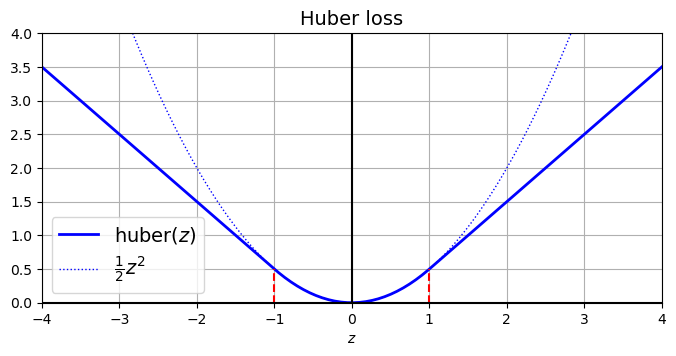

In [70]:
import matplotlib.pyplot as plt 
import matplotlib as mpl 

plt.figure(figsize=(8, 3.5))
z = np.linspace(-4, 4, 200)
plt.plot(z, huber_fn(0, z), "b-", linewidth=2, label="huber($z$)")
plt.plot(z, z**2 / 2, "b:", linewidth=1, label=r"$\frac{1}{2}z^2$")
plt.plot([-1, -1], [0, huber_fn(0., -1.)], "r--")
plt.plot([1, 1], [0, huber_fn(0., 1.)], "r--")
plt.gca().axhline(y=0, color='k')
plt.gca().axvline(x=0, color='k')
plt.axis([-4, 4, 0, 4])
plt.grid(True)
plt.xlabel("$z$")
plt.legend(fontsize=14)
plt.title("Huber loss", fontsize=14)
plt.show()

In [71]:
from tensorflow import keras

In [72]:
X_train.shape

(11610, 8)

In [73]:
X_train.shape[1:]

(8,)

In [74]:
input_shape = X_train.shape[1:]

# create sequential model 
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

/Users/rohitabhishek/miniconda3/envs/tensor/lib/python3.10/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [75]:
model.compile(loss=huber_fn, optimizer="nadam", metrics=["mae"])

In [76]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2


2025-07-04 19:23:18.427026: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


363/363 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - loss: 0.9660 - mae: 1.3766 - val_loss: 0.2357 - val_mae: 0.5210
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.2029 - mae: 0.4925 - val_loss: 0.1952 - val_mae: 0.4759


# Saving/Loading model with Custom Object 

In [78]:
model.save("OUTPUT/Chapter12/my_model_with_a_custom_loss.keras")

In [80]:
# load the model with custom fuciton mapped to actual function 
model = keras.models.load_model("OUTPUT/Chapter12/my_model_with_a_custom_loss.keras",
                                custom_objects={"huber_fn": huber_fn})

In [81]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.1900 - mae: 0.4734 - val_loss: 0.1947 - val_mae: 0.4770
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.1931 - mae: 0.4795 - val_loss: 0.1819 - val_mae: 0.4630


In [82]:
def create_huber(threshold=1.0):
    def huber_fn(y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = threshold * tf.abs(error) - threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    return huber_fn

In [83]:
model.compile(loss=create_huber(2.0), optimizer="nadam", metrics=["mae"])

In [84]:

model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.2123 - mae: 0.4769 - val_loss: 0.2205 - val_mae: 0.4762
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.2112 - mae: 0.4773 - val_loss: 0.2312 - val_mae: 0.4814


In [85]:
# load the model
model.save("OUTPUT/Chapter12/my_model_with_a_custom_loss_threshold_2.keras")

In [86]:
# Load the model with custom threshold value 
model = keras.models.load_model("OUTPUT/Chapter12/my_model_with_a_custom_loss_threshold_2.keras",
                                custom_objects={"huber_fn": create_huber(2.0)})

In [87]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.2152 - mae: 0.4780 - val_loss: 0.2338 - val_mae: 0.4754
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.1990 - mae: 0.4643 - val_loss: 0.2019 - val_mae: 0.4580


```
Above model poses challenge where threshold value needs to be provided post loading the value. To solve this problem we can have a class defined and object created by this class will be used when loading the model again 

In [88]:
class HuberLoss(keras.losses.Loss):
    def __init__(self, threshold=1.0, **kwargs):
        self.threshold = threshold
        super().__init__(**kwargs)
    def call(self, y_true, y_pred):
        error = y_true - y_pred
        is_small_error = tf.abs(error) < self.threshold
        squared_loss = tf.square(error) / 2
        linear_loss  = self.threshold * tf.abs(error) - self.threshold**2 / 2
        return tf.where(is_small_error, squared_loss, linear_loss)
    def get_config(self):
        base_config = super().get_config()
        return {**base_config, "threshold": self.threshold}

In [89]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1),
])

In [90]:
# compile the model with 2.0 threshold value. WE will use get_config() method to retreive these configurations 
model.compile(loss=HuberLoss(2.), optimizer="nadam", metrics=["mae"])

In [91]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 1.4376 - mae: 1.4748 - val_loss: 0.2902 - val_mae: 0.5611
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.2775 - mae: 0.5550 - val_loss: 0.2408 - val_mae: 0.5012


In [93]:
model.save("OUTPUT/Chapter12/my_model_with_a_custom_loss_class.keras")

In [94]:
model = keras.models.load_model("OUTPUT/Chapter12/my_model_with_a_custom_loss_class.keras",
                                custom_objects={"HuberLoss": HuberLoss})

model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.2335 - mae: 0.5076 - val_loss: 0.2500 - val_mae: 0.4991
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.2272 - mae: 0.4979 - val_loss: 0.2482 - val_mae: 0.4889


In [95]:
model.loss.threshold

2.0

### Other Custom Functions 
Most of the keras functions such as losses, regularizer, constraints, initializers, metrics, activation function, layers and even full model can be customized in very much same way

In [96]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [97]:
def my_softplus(z): # return value is just tf.nn.softplus(z)
    return tf.math.log(tf.exp(z) + 1.0)

def my_glorot_initializer(shape, dtype=tf.float32):
    stddev = tf.sqrt(2. / (shape[0] + shape[1]))
    return tf.random.normal(shape, stddev=stddev, dtype=dtype)

def my_l1_regularizer(weights):
    return tf.reduce_sum(tf.abs(0.01 * weights))

def my_positive_weights(weights): # return value is just tf.nn.relu(weights)
    return tf.where(weights < 0., tf.zeros_like(weights), weights)

In [98]:
layer = keras.layers.Dense(1, activation=my_softplus,
                           kernel_initializer=my_glorot_initializer,
                           kernel_regularizer=my_l1_regularizer,
                           kernel_constraint=my_positive_weights)

In [99]:

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [100]:
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

In [101]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.4767 - mae: 0.4987 - val_loss: 0.6340 - val_mae: 0.4764
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.4562 - mae: 0.4923 - val_loss: 0.4086 - val_mae: 0.4627


In [103]:
model.save("OUTPUT/Chapter12/my_model_with_many_custom_parts.keras")

In [104]:
model = keras.models.load_model(
    "OUTPUT/Chapter12/my_model_with_many_custom_parts.keras",
    custom_objects={
       "my_l1_regularizer": my_l1_regularizer,
       "my_positive_weights": my_positive_weights,
       "my_glorot_initializer": my_glorot_initializer,
       "my_softplus": my_softplus,
    })

In [105]:
class MyL1Regularizer(keras.regularizers.Regularizer):
    def __init__(self, factor):
        self.factor = factor
    def __call__(self, weights):
        return tf.reduce_sum(tf.abs(self.factor * weights))
    def get_config(self):
        return {"factor": self.factor}

In [106]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [109]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=input_shape),
    keras.layers.Dense(1, activation=my_softplus,
                       kernel_regularizer=MyL1Regularizer(0.01),
                    #    kernel_constraint=my_positive_weights,
                       kernel_initializer=my_glorot_initializer),
])

In [110]:
model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

In [111]:
model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 2.0104 - mae: 1.0124 - val_loss: 0.5044 - val_mae: 0.4839
Epoch 2/2
363/363 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.5460 - mae: 0.5013 - val_loss: 0.4658 - val_mae: 0.4558
